In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances

import random 
from scipy.cluster.hierarchy import dendrogram

plt.rcParams["figure.figsize"] = (12,6)
sns.set_theme(style="darkgrid", palette="pastel")


In [2]:
# Loading Data
data = pd.read_csv("./P3/gene_ex.csv",header=None)
data.shape

(1000, 40)

In [3]:
def DendogramMaker(data,metric="euclidean",method="Single"):
    #format of data => rows: features, col: samples
    
    # make distance matrix
    if metric == "euclidean":
        X = euclidean_distances(data.T, data.T)
    elif metric == "corelation":
        X = np.dot(np.array(1-abs(data.corr())),np.array(1-abs(data.corr())))

    # reshape distance matrix to a vector and list the indexes
    N = X.shape[0]
    if method == "Single":
        SortedIndex = np.reshape(X,(N*N,)).argsort()[::]
    elif method == "Complete":
        SortedIndex = np.reshape(X,(N*N,)).argsort()[::-1]

    # variables to stroe link of clusters and count of included cluster
    Meets = {}
    Clusters = {}

    # assume defualt values to prior clusters
    for i in range(N):
        Meets[i] = 1 
        Clusters[i] = i

    # stroing dendogram information bsed on regular format = [[no. Cluster1 , no. Cluster2, distance merge, count of Clusters],
    #                                                         [[no. Cluster1 , no. Cluster2, distance merge, count of Clusters], ...]
    Dendogram = []
    ClusterCount = X.shape[0]
    
    index = 0
    while index != max(SortedIndex)+1:
        
        # get index of clusters (convert 1D index to 2D indexes)
        cluster_1 =  int(SortedIndex[index]/N)
        cluster_2 =  SortedIndex[index]%N
        index+=1
        
        i,j = cluster_1,cluster_2
        
        # find the father Cluster if exist
        while Clusters[cluster_1] != cluster_1:
            cluster_1 = Clusters[cluster_1]

        while Clusters[cluster_2] != cluster_2:
            cluster_2 = Clusters[cluster_2]

        # check if before is merged or not
        if cluster_1 == cluster_2:
            continue
 
        # Count of members for final Clusters
        meet = Meets[i]+ Meets[j]
        Meets[i] = meet
        Meets[j] = meet
        
        # make new cluster
        new_cluster = [Clusters[cluster_1],Clusters[cluster_2],X[i][j],meet]
        
        # add new cluster to dendogram vector
        Dendogram.append(np.array(new_cluster))
        
        # update father cluster to merged clusters
        Clusters[cluster_1] = ClusterCount
        Clusters[cluster_2] = ClusterCount
        Clusters[ClusterCount] = ClusterCount
        
        # new index for next cluster
        ClusterCount += 1
        
        
   
    Dendogram = np.array(Dendogram)
    return Dendogram,Clusters
    

    
        



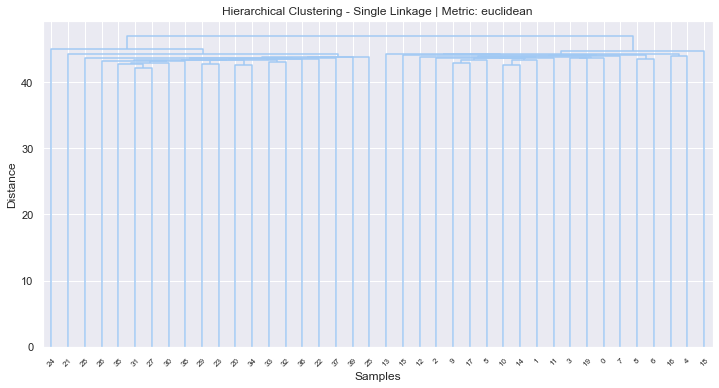

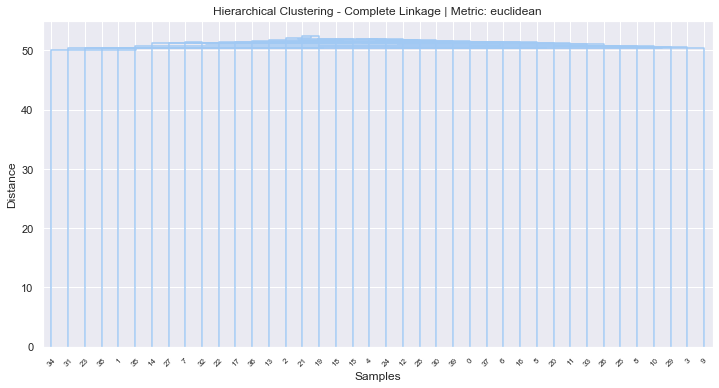

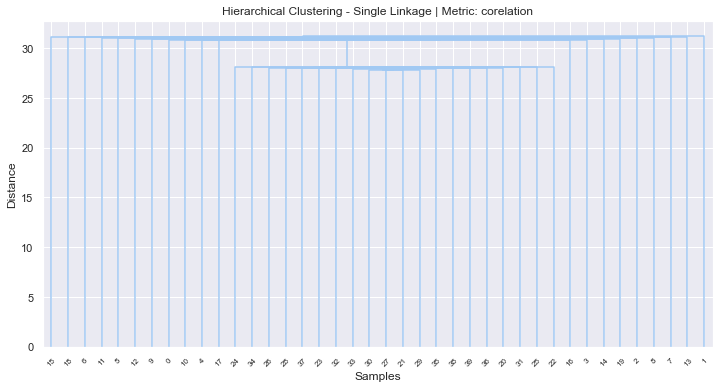

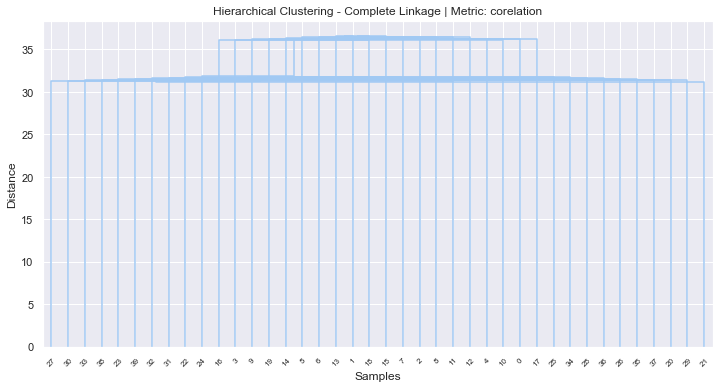

In [4]:
metric = ["euclidean","corelation"]
methods = ["Single","Complete"]
# running Clustering for deffirent situations
for met in metric:
    for method in methods:
            Dendogram,Clusters = DendogramMaker(data,met,method)
            dn = dendrogram(Dendogram)
            plt.title("Hierarchical Clustering - {1} Linkage | Metric: {0}".format(met,method))
            plt.xlabel("Samples")
            plt.ylabel("Distance")
            plt.show()
            
